# Mean-Variance Analysis and the Sharpe Ratio

## Getting started

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

In [2]:
returns = pd.read_csv("returns.csv", index_col = "Date", parse_dates = ["Date"])
returns

,GBP_USD,USD_GBP,Levered,Low_Vol,Random,Neutral
Date,,,,,,
2010-01-02,-0.002733,0.002733,0.006275,0.0,0.002733,0
2010-01-03,-0.001727,0.001727,0.003967,0.0,0.000000,0
2010-01-04,-0.005786,0.005786,0.013259,0.0,0.005786,0
2010-01-05,0.001687,-0.001687,-0.003884,0.0,0.001687,0
2010-01-06,-0.005446,0.005446,0.012482,0.0,0.005446,0
...,...,...,...,...,...,...
2020-12-23,0.005004,-0.005004,-0.011548,0.0,-0.005004,0
2020-12-27,-0.008278,0.008278,0.018937,0.0,-0.008278,0
2020-12-28,0.003799,-0.003799,-0.008760,0.0,-0.003799,0


GBP_USD: Long Position in GBP (denominated in USD) <br>
USD_GBP: Short Position in GBP (== Long Position in USD; denominated in GBP) <br>
Levered: USD_GBP with Leverage ("Trading USD_GBP on Margin") <br>
Neutral: Neutral Positions only (no Investments / Trades)  <br>
Low_Vol: Active Strategy for USD_GBP with Long, Short and Neutral Positions <br>
Random: Random "Strategy" for USD_GBP with random Long, Short and Neutral Positions

In [3]:
returns.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3139 entries, 2010-01-02 to 2020-12-30
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   GBP_USD  3139 non-null   float64
 1   USD_GBP  3139 non-null   float64
 2   Levered  3139 non-null   float64
 3   Low_Vol  3139 non-null   float64
 4   Random   3139 non-null   float64
 5   Neutral  3139 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 171.7 KB


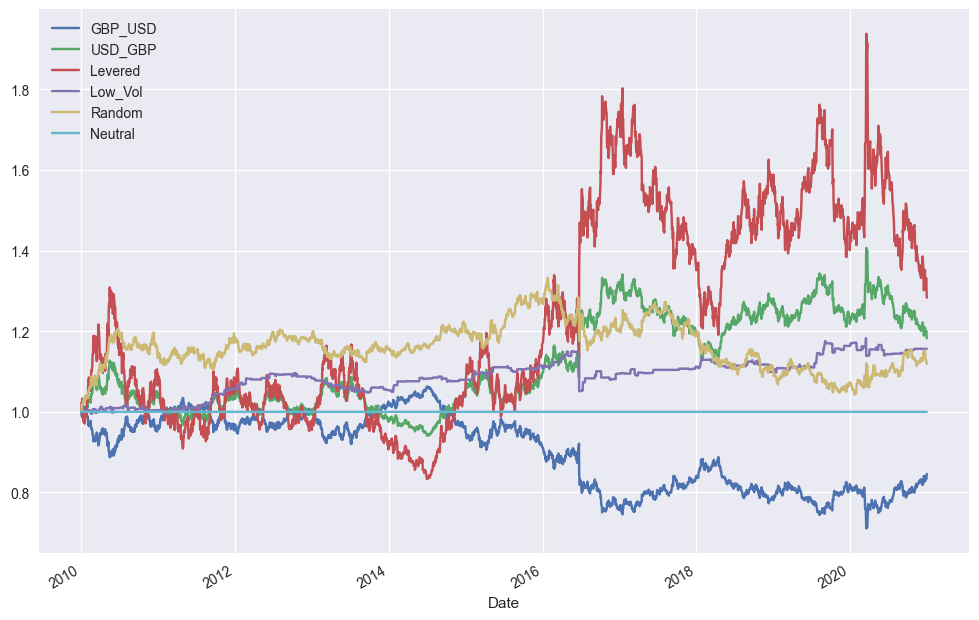

In [4]:
returns.cumsum().apply(np.exp).plot(figsize = (12, 8))
plt.show()

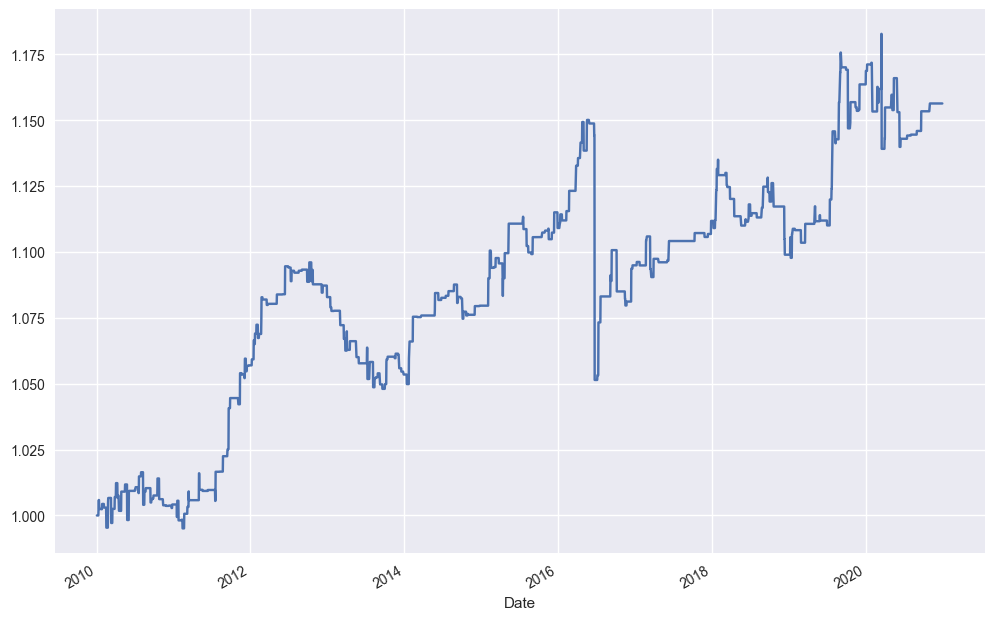

In [5]:
returns.Low_Vol.cumsum().apply(np.exp).plot(figsize = (12, 8))
plt.show()

In [6]:
returns.Low_Vol.value_counts()

Low_Vol
 0.000000    2826
-0.001950       1
 0.001149       1
 0.011488       1
 0.001376       1
             ... 
 0.002467       1
-0.002912       1
-0.005013       1
 0.003929       1
 0.002567       1
Name: count, Length: 314, dtype: int64

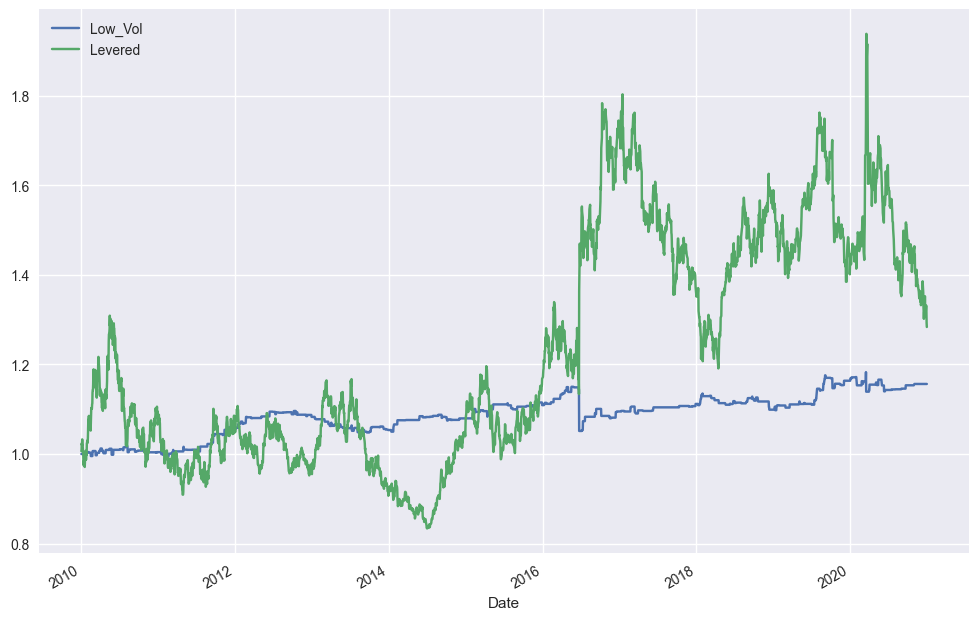

In [7]:
returns[["Low_Vol", "Levered"]].cumsum().apply(np.exp).plot(figsize = (12, 8))
plt.show()

__Which one would you (intuitively) prefer?__

__Low_Vol__, right? Let´s create a __risk-adjusted return metric__ that reflects/confirms this intuition!

## Mean Return (Reward)

In [8]:
returns

,GBP_USD,USD_GBP,Levered,Low_Vol,Random,Neutral
Date,,,,,,
2010-01-02,-0.002733,0.002733,0.006275,0.0,0.002733,0
2010-01-03,-0.001727,0.001727,0.003967,0.0,0.000000,0
2010-01-04,-0.005786,0.005786,0.013259,0.0,0.005786,0
2010-01-05,0.001687,-0.001687,-0.003884,0.0,0.001687,0
2010-01-06,-0.005446,0.005446,0.012482,0.0,0.005446,0
...,...,...,...,...,...,...
2020-12-23,0.005004,-0.005004,-0.011548,0.0,-0.005004,0
2020-12-27,-0.008278,0.008278,0.018937,0.0,-0.008278,0
2020-12-28,0.003799,-0.003799,-0.008760,0.0,-0.003799,0


__mean return__

In [9]:
returns.mean()

GBP_USD   -0.000053
USD_GBP    0.000053
Levered    0.000080
Low_Vol    0.000046
Random     0.000036
Neutral    0.000000
dtype: float64

__annualized mean return__

In [10]:
td_year = returns.count() / ((returns.index[-1] - returns.index[0]).days / 365.25)
td_year

GBP_USD    285.559091
USD_GBP    285.559091
Levered    285.559091
Low_Vol    285.559091
Random     285.559091
Neutral    285.559091
dtype: float64

In [11]:
ann_mean = returns.mean() * td_year
ann_mean

GBP_USD   -0.015231
USD_GBP    0.015231
Levered    0.022704
Low_Vol    0.013213
Random     0.010229
Neutral    0.000000
dtype: float64

In [12]:
np.exp(ann_mean) - 1 # CAGR

GBP_USD   -0.015116
USD_GBP    0.015348
Levered    0.022964
Low_Vol    0.013300
Random     0.010281
Neutral    0.000000
dtype: float64

In [13]:
summary = pd.DataFrame(data = {"ann_mean":ann_mean})
summary

,ann_mean
GBP_USD,-0.015231
USD_GBP,0.015231
Levered,0.022704
Low_Vol,0.013213
Random,0.010229
Neutral,0.000000


In [14]:
summary.rank(ascending = False)

,ann_mean
GBP_USD,6.0
USD_GBP,2.0
Levered,1.0
Low_Vol,3.0
Random,4.0
Neutral,5.0


## Standard Deviation (Risk)

In [15]:
returns

,GBP_USD,USD_GBP,Levered,Low_Vol,Random,Neutral
Date,,,,,,
2010-01-02,-0.002733,0.002733,0.006275,0.0,0.002733,0
2010-01-03,-0.001727,0.001727,0.003967,0.0,0.000000,0
2010-01-04,-0.005786,0.005786,0.013259,0.0,0.005786,0
2010-01-05,0.001687,-0.001687,-0.003884,0.0,0.001687,0
2010-01-06,-0.005446,0.005446,0.012482,0.0,0.005446,0
...,...,...,...,...,...,...
2020-12-23,0.005004,-0.005004,-0.011548,0.0,-0.005004,0
2020-12-27,-0.008278,0.008278,0.018937,0.0,-0.008278,0
2020-12-28,0.003799,-0.003799,-0.008760,0.0,-0.003799,0


__Standard Deviation of Returns__

In [16]:
returns.std()

GBP_USD    0.005395
USD_GBP    0.005395
Levered    0.012358
Low_Vol    0.002383
Random     0.004614
Neutral    0.000000
dtype: float64

__Annualized Standard Deviation__

In [17]:
td_year

GBP_USD    285.559091
USD_GBP    285.559091
Levered    285.559091
Low_Vol    285.559091
Random     285.559091
Neutral    285.559091
dtype: float64

In [18]:
ann_std = returns.std() * np.sqrt(td_year)
ann_std

GBP_USD    0.091162
USD_GBP    0.091162
Levered    0.208838
Low_Vol    0.040267
Random     0.077976
Neutral    0.000000
dtype: float64

In [19]:
summary["ann_std"] = returns.std() * np.sqrt(td_year)

In [20]:
summary.sort_values(by = "ann_std")

,ann_mean,ann_std
Neutral,0.000000,0.000000
Low_Vol,0.013213,0.040267
Random,0.010229,0.077976
GBP_USD,-0.015231,0.091162
USD_GBP,0.015231,0.091162
Levered,0.022704,0.208838


## Risk-adjusted Return ("Sharpe Ratio")

In [21]:
summary

,ann_mean,ann_std
GBP_USD,-0.015231,0.091162
USD_GBP,0.015231,0.091162
Levered,0.022704,0.208838
Low_Vol,0.013213,0.040267
Random,0.010229,0.077976
Neutral,0.000000,0.000000


__Graphical Solution__

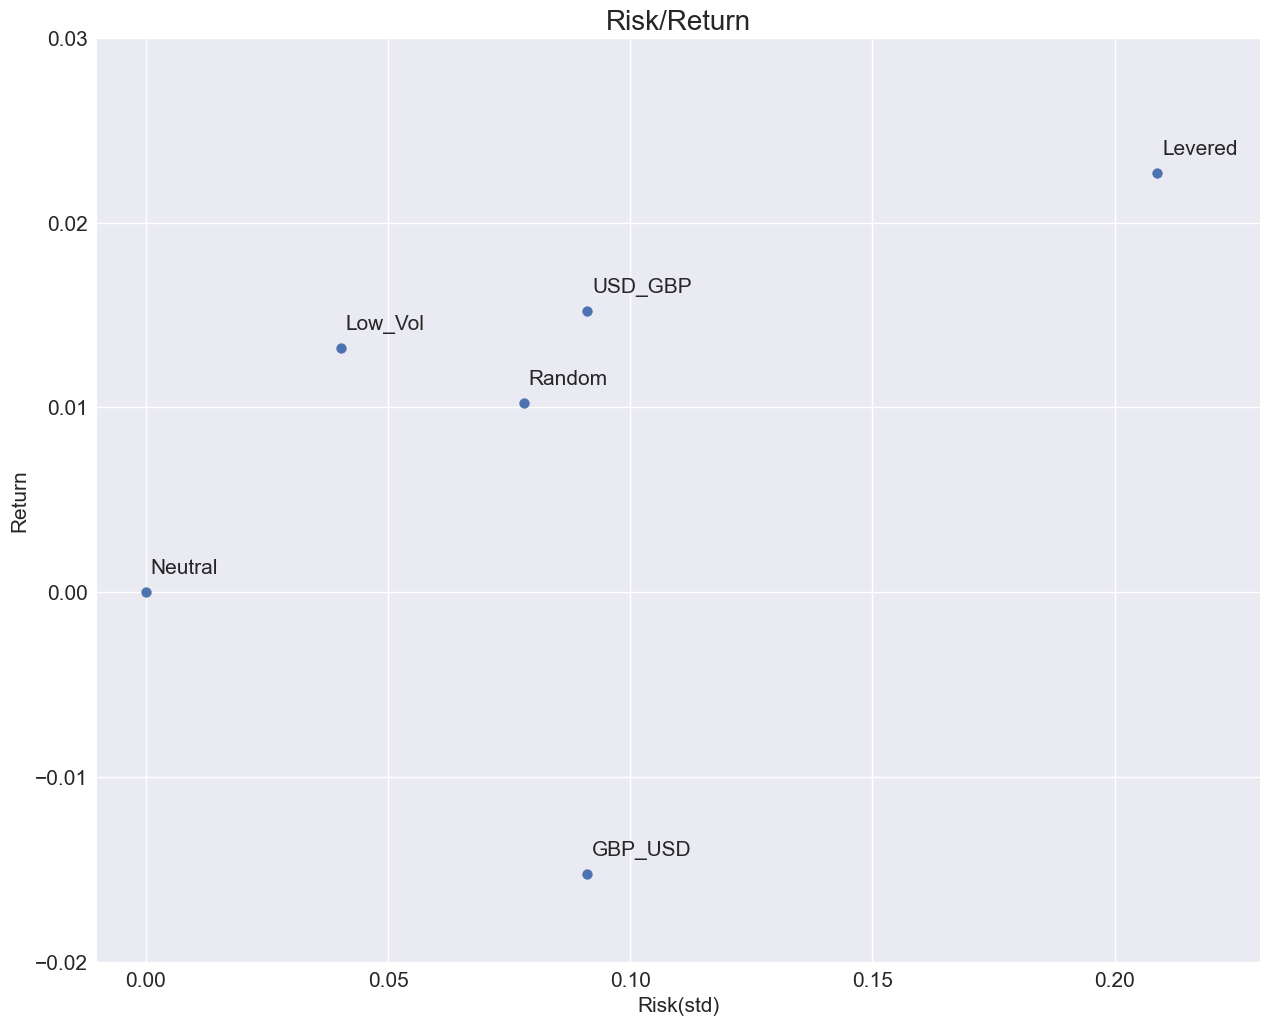

In [22]:
summary.plot(kind = "scatter", x = "ann_std", y = "ann_mean", figsize = (15,12), s = 50, fontsize = 15)
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "ann_std"]+0.001, summary.loc[i, "ann_mean"]+0.001), size = 15)
plt.xlim(-0.01, 0.23)
plt.ylim(-0.02, 0.03)
plt.xlabel("Risk(std)", fontsize = 15)
plt.ylabel("Return", fontsize = 15)
plt.title("Risk/Return", fontsize = 20)
plt.show()

__Risk-adjusted Return Metric__ ("Sharpe Ratio light")

In [23]:
rf = 0 # simplification, don´t use this assumption for Portfolio Management!

In [24]:
summary["Sharpe"] = (summary.ann_mean - rf) / summary.ann_std

In [25]:
summary.sort_values(by = "Sharpe", ascending = False)

,ann_mean,ann_std,Sharpe
Low_Vol,0.013213,0.040267,0.328121
USD_GBP,0.015231,0.091162,0.167078
Random,0.010229,0.077976,0.131181
Levered,0.022704,0.208838,0.108715
GBP_USD,-0.015231,0.091162,-0.167078
Neutral,0.000000,0.000000,NaN


In [26]:
td_year

GBP_USD    285.559091
USD_GBP    285.559091
Levered    285.559091
Low_Vol    285.559091
Random     285.559091
Neutral    285.559091
dtype: float64

In [27]:
returns.mean() / returns.std() * np.sqrt(td_year) # alternative: annualizing daily sharpe

GBP_USD   -0.167078
USD_GBP    0.167078
Levered    0.108715
Low_Vol    0.328121
Random     0.131181
Neutral         NaN
dtype: float64

## Putting everything together

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

In [29]:
returns = pd.read_csv("returns.csv", index_col = "Date", parse_dates = ["Date"])
returns

,GBP_USD,USD_GBP,Levered,Low_Vol,Random,Neutral
Date,,,,,,
2010-01-02,-0.002733,0.002733,0.006275,0.0,0.002733,0
2010-01-03,-0.001727,0.001727,0.003967,0.0,0.000000,0
2010-01-04,-0.005786,0.005786,0.013259,0.0,0.005786,0
2010-01-05,0.001687,-0.001687,-0.003884,0.0,0.001687,0
2010-01-06,-0.005446,0.005446,0.012482,0.0,0.005446,0
...,...,...,...,...,...,...
2020-12-23,0.005004,-0.005004,-0.011548,0.0,-0.005004,0
2020-12-27,-0.008278,0.008278,0.018937,0.0,-0.008278,0
2020-12-28,0.003799,-0.003799,-0.008760,0.0,-0.003799,0


In [30]:
def sharpe(series, rf = 0):
    
    if series.std() == 0:
        return np.nan
    else:
        return (series.mean() - rf) / series.std() * np.sqrt(series.count() / ((series.index[-1] - series.index[0]).days / 365.25))

In [31]:
returns.apply(sharpe, rf = 0)

GBP_USD   -0.167078
USD_GBP    0.167078
Levered    0.108715
Low_Vol    0.328121
Random     0.131181
Neutral         NaN
dtype: float64

In [32]:
sharpe(series = returns.Levered, rf = 0)

0.10871510012958413

------------------------------

## Coding Challenge

__Calculate and compare__ the __Sharpe Ratio__ (assumption: rf == 0) for __30 large US stocks__ that currently form the Dow Jones Industrial Average Index ("Dow Jones") for the time period between April 2019 and June 2021. 

__Hint:__ You can __import__ the price data from __"Dow_Jones.csv"__.
 

Determine the __best performing stock__ and the __worst performing stock__ according to the Sharpe Ratio.

(Remark: Dividends are ignored here. Hence, for simplicity reasons, the Sharpe Ratio is based on Price Returns only. As a consequence, dividend-paying stocks are getting penalized.) 

## +++ Please stop here in case you don´t want to see the solution!!! +++++

## Coding Challenge Solution

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("Dow_Jones.csv", index_col = "Date", parse_dates = ["Date"])
df

In [ ]:
df.info()

In [ ]:
returns = np.log(df / df.shift()) # daily log returns
returns

In [ ]:
def sharpe(series, rf = 0):
    
    if series.std() == 0:
        return np.nan
    else:
        return (series.mean() - rf) / series.std() * np.sqrt(series.count() / ((series.index[-1] - series.index[0]).days / 365.25))

In [ ]:
returns.apply(sharpe).sort_values(ascending = False)

Best Performing Stock: __Apple__ (AAPL) <br>
Worst Performing Stock: __Non-determinable__ (note: you can´t compare negative Sharpe Ratios)